# Machine Learning: classificação com SKLearn

##### Projeto 1 - classificação entre porco e cachorro

In [1]:
# features (1 sim, 0 não)
# pelo longo?
# perna curta?
# faz auau?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

# 1 => porco, 0 => cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] # labels / etiqueta

In [2]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [3]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]
previsoes = model.predict(teste_x)

In [4]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print("Taxa de acerto %.2f" % (taxa_de_acerto * 100))

Taxa de acerto 66.67


In [5]:
from sklearn.metrics import accuracy_score

taxa_de_acerto = accuracy_score(teste_y, previsoes)
print("Taxa de acerto %.2f" % (taxa_de_acerto * 100))

Taxa de acerto 66.67


##### Projeto 2 -  Prever se um usuário irá ou não comprar um produto de um site

In [6]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [7]:
mapa = {
    "home" : "principal",
    "how_it_works" : "como_funciona",
    "contact" : "contato",
    "bought" : "comprou"
}
dados = dados.rename(columns = mapa)

In [8]:
x = dados[["principal","como_funciona","contato"]]
x.head()

,principal,como_funciona,contato
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [9]:
y = dados["comprou"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: comprou, dtype: int64

In [10]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 95.83%


###### Usando a Biblioteca para separar o treino e o teste

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state = SEED, test_size = 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


In [13]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [14]:
teste_y.value_counts()

0    19
1     6
Name: comprou, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi 96.00%


##### Projeto 3 - Prever se o trabalho de criação de um site será pego ou não

In [16]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [17]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [18]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

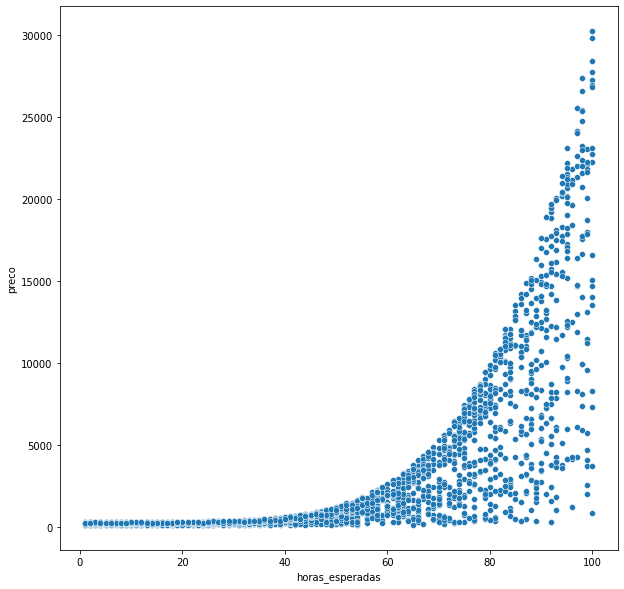

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

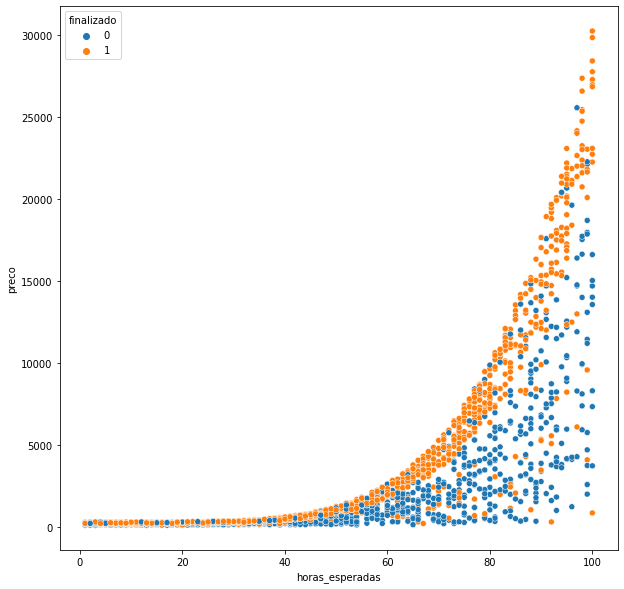

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

<Figure size 720x720 with 0 Axes>

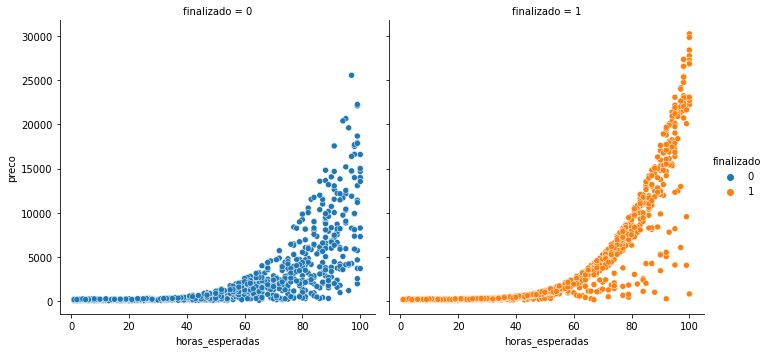

In [21]:
plt.figure(figsize=(10,10))
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

In [22]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 42
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 57.59%


C:\Users\angel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [24]:
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia do algoritmo de baseline foi %.2f%%" % acuracia)

A acurácia do algoritmo de baseline foi 52.59%


O baseline é um meio de medição inicial que utiliza uma matriz com todos os valores iguais de resultado para se ter uma compreensão inicial se o modelo está bom ou não

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

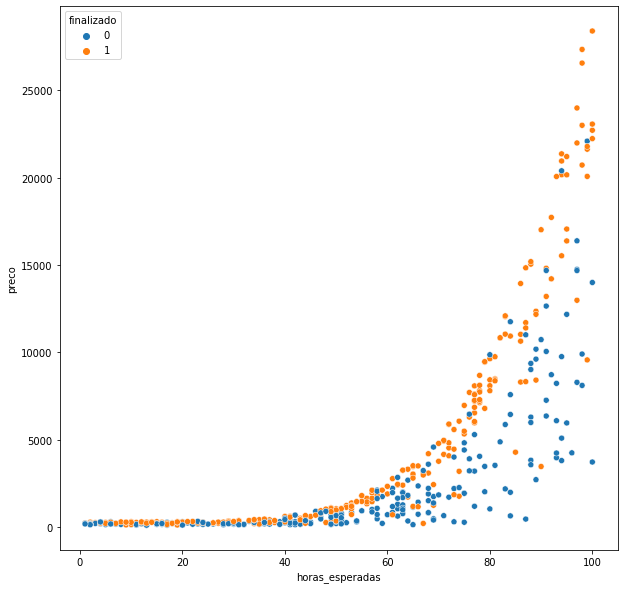

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x)

In [26]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 28398


In [27]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [28]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

C:\Users\angel\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

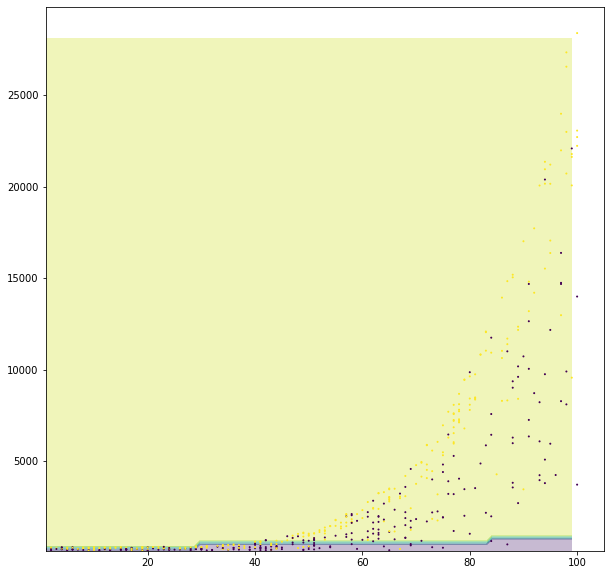

In [29]:
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

# DECISION BOUNDARY

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 42
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 56.85%


C:\Users\angel\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


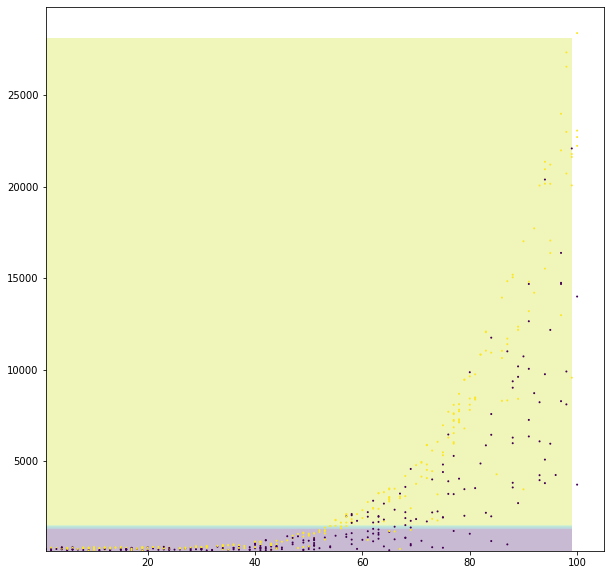

In [31]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [32]:
from sklearn.preprocessing import StandardScaler

SEED = 42
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 67.78%


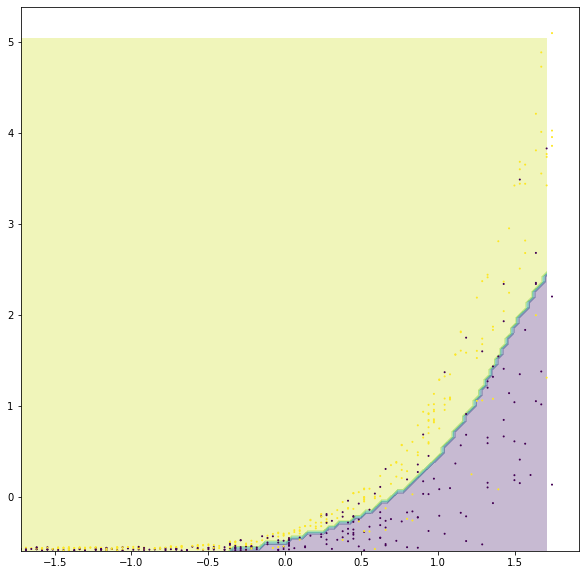

In [33]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)

##### Projeto 4 - Prever se um carro será ou não vendido

In [34]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [35]:
a_renomear = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [36]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [37]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [38]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [39]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano","ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


C:\Users\angel\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [41]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


In [42]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier()
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100

print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


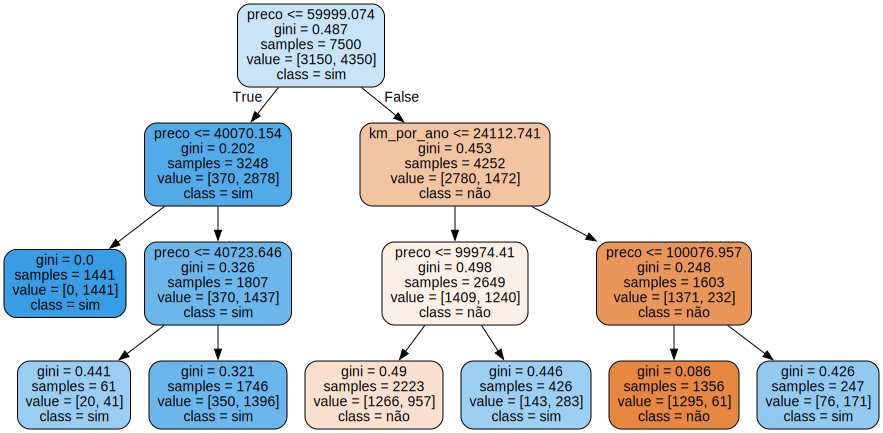

In [45]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico